<a href="https://colab.research.google.com/github/SreedeviSagar/Image_classification_CNN/blob/main/pet_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install -q keras


In [3]:
!pip install -q keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [4]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras_tuner
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten,Dropout
from keras_tuner import RandomSearch
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [5]:
#resize the image
image_size=(128,128)

In [6]:
train_path='/content/drive/MyDrive/Colab Notebooks/pet_dataset/train'
test_path='/content/drive/MyDrive/Colab Notebooks/pet_dataset/test'

**DATA PREPROCESSING**

In [7]:
#Preprocessing the training data
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Import the training dataset
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = image_size,
                                                 batch_size = 16,
                                                 class_mode = 'binary')


Found 8005 images belonging to 2 classes.


In [8]:
#Preprocessing the test data
#Feature scaling
test_datagen = ImageDataGenerator(rescale = 1./255)

#Import the test dataset
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = image_size,
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


**Build CNN model**

In [9]:
#Initializing the cnn model
cnn_model=Sequential()

In [10]:
# Add first convolutional layer with pooling
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128,128,3)))
cnn_model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
# Add second convolutional layer with pooling
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
#Add Flattening Layer
cnn_model.add(Flatten())

In [13]:
#Add Full Connected Layer
cnn_model.add(Dense(units=128, activation='relu'))

In [14]:
#Add Output Layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

**TRAINING THE CNN MODEL**

In [16]:
# Compiling the CNN
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
#callback
#model checkpoint
mc=ModelCheckpoint(filepath='bestmodel.h5',monitor='val_loss',verbose=1,save_best_only=True)
#early stopping
es=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=3,verbose=1)
cb=[mc,es]

In [18]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history = cnn_model.fit(training_set, validation_data=test_set, epochs=30,
                              steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
501/501 [==============================] - 1306s 3s/step - loss: 0.6740 - accuracy: 0.5919 - val_loss: 0.6093 - val_accuracy: 0.6826
Epoch 2/30
501/501 [==============================] - 232s 463ms/step - loss: 0.6222 - accuracy: 0.6586 - val_loss: 0.5596 - val_accuracy: 0.7173
Epoch 3/30
501/501 [==============================] - 230s 459ms/step - loss: 0.5697 - accuracy: 0.7042 - val_loss: 0.5335 - val_accuracy: 0.7385
Epoch 4/30
501/501 [==============================] - 230s 458ms/step - loss: 0.5301 - accuracy: 0.7295 - val_loss: 0.5409 - val_accuracy: 0.7395
Epoch 5/30
501/501 [==============================] - 227s 453ms/step - loss: 0.5039 - accuracy: 0.7552 - val_loss: 0.5229 - val_accuracy: 0.7504
Epoch 6/30
501/501 [==============================] - 227s 454ms/step - loss: 0.4777 - accuracy: 0.7705 - val_loss: 0.4975 - val_accuracy: 0.7687
Epoch 7/30
501/501 [==============================] - 230s 458ms/step - loss: 0.4496 - accuracy: 0.7868 - val_loss: 0.4710 - v

**MODEL EVALUATION**

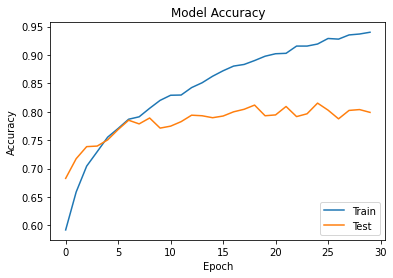

In [19]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


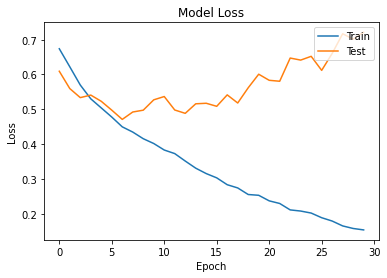

In [20]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**MAKE PREDICTIONS**

1/1 [==============================] - 0s 30ms/step
[[0.99955124]]
Prediction: It's a Dog's image.


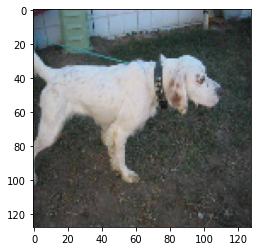

In [33]:
image_pred = image.load_img('/content/drive/MyDrive/Colab Notebooks/pet_dataset/test/dogs/dog.4019.jpg', target_size = image_size)
image_pred = image.img_to_array(image_pred)
image_pred = image_pred/255
plt.imshow(image_pred)
image_data=np.expand_dims(image_pred,axis=0)
result = cnn_model.predict(image_data)
#result=np.argmax(result,axis=1)
print(result)
if result>=0.5:
  print("Prediction: It's a Dog's image.")
elif result<=0.5:
  print("Prediction: It's a Cat's image.")

1/1 [==============================] - 0s 39ms/step
[[0.24122897]]
Prediction: It's a Cat's image.


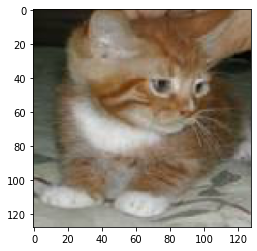

In [38]:
image_pred = image.load_img('/content/drive/MyDrive/Colab Notebooks/pet_dataset/test/cats/cat.4029.jpg', target_size = image_size)
image_pred = image.img_to_array(image_pred)
image_pred = image_pred/255
plt.imshow(image_pred)
image_data=np.expand_dims(image_pred,axis=0)
result = cnn_model.predict(image_data)
print(result)
if result>=0.5:
  print("Prediction: It's a Dog's image.")
elif result<=0.5:
  print("Prediction: It's a Cat's image.")

**SAVE THE MODEL**

In [39]:
cnn_model.save('cnn_model.h5')